Step 1: Load and Organize Data

In [72]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import random

# Set the folder path
folder_path = r"C:\Users\raghu\OneDrive\Desktop\USD Notes\Sem 3\AI in Medical Imaging Informatica\Project 1\MontgomerySet\CXR_png"

# Initialize lists to hold image data and labels
images = []
labels = []

# Load the images and labels
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
        label = int(filename.split('_')[2].split('.')[0])
        labels.append(label)
        img_path = os.path.join(folder_path, filename)
        img = load_img(img_path, target_size=(256, 256))  # Resize images to 256x256
        img_array = img_to_array(img)
        images.append(img_array)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize images
images = images / 255.0


Display Sample Images

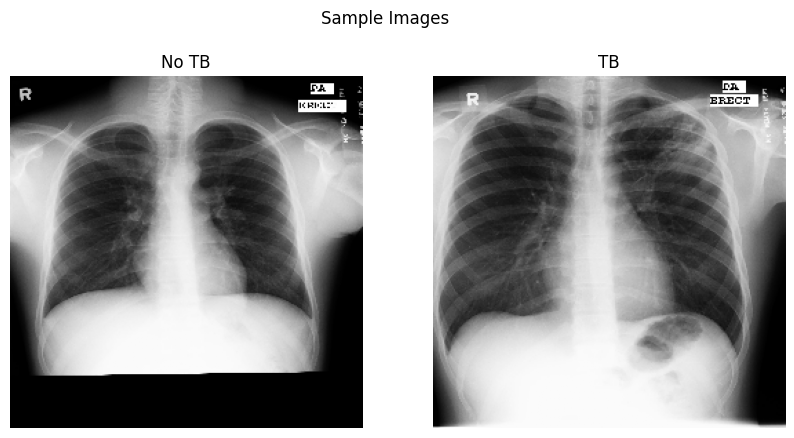

In [73]:
# Function to display images
def display_sample_images(images, labels, class_names):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle('Sample Images')

    for i, class_name in enumerate(class_names):
        idx = random.choice(np.where(labels == i)[0])
        axes[i].imshow(images[idx])
        axes[i].set_title(class_name)
        axes[i].axis('off')

    plt.show()

# Class names
class_names = ['No TB', 'TB']

# Display sample images
display_sample_images(images, labels, class_names)

Step 2: Split the Data

In [74]:
# Split the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

Step 3: Build the Neural Network

In [75]:
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\raghu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Step 4: Train the Model

In [76]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.4298 - loss: 2.6350 - val_accuracy: 0.6429 - val_loss: 0.6512
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.5853 - loss: 0.7467 - val_accuracy: 0.4643 - val_loss: 0.7032
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.5952 - loss: 0.6764 - val_accuracy: 0.5000 - val_loss: 0.6957
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.6217 - loss: 0.6228 - val_accuracy: 0.6071 - val_loss: 0.6102
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.7461 - loss: 0.5532 - val_accuracy: 0.6786 - val_loss: 0.5821
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.8450 - loss: 0.4854 - val_accuracy: 0.7857 - val_loss: 0.5077
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.8762 - loss: 0.3547 - val_accuracy: 0.7857 - val_loss: 0.4479
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.8590 - loss: 0.3143 - val_accuracy: 0.8571 - val_loss: 0.4947
Epoch 9/

Step 5: Evaluate the Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 910ms/step - accuracy: 0.8571 - loss: 0.3662
Test Loss: 0.36619076132774353
Test Accuracy: 0.8571428656578064


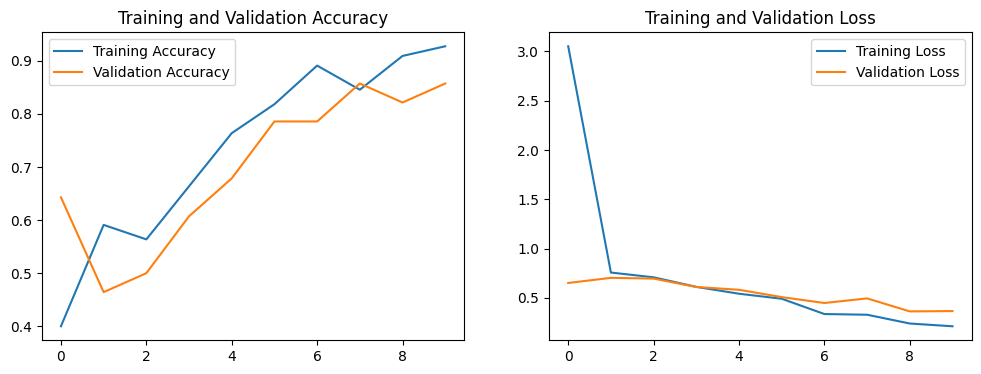

In [77]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


Step 6: Confusion Matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


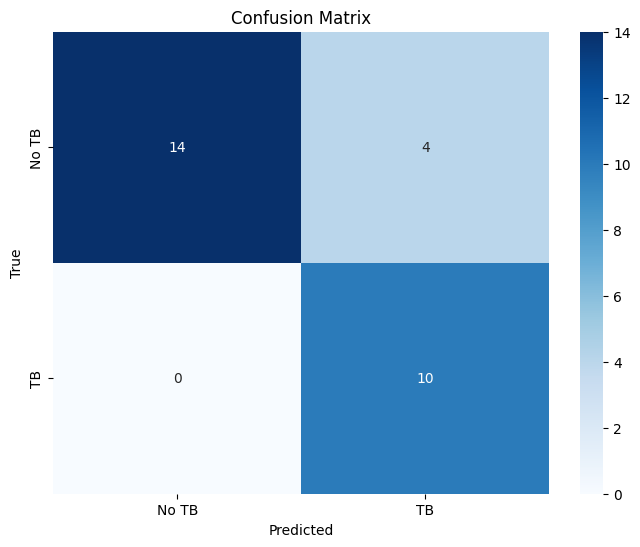

              precision    recall  f1-score   support

       No TB       1.00      0.78      0.88        18
          TB       0.71      1.00      0.83        10

    accuracy                           0.86        28
   macro avg       0.86      0.89      0.85        28
weighted avg       0.90      0.86      0.86        28



In [78]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No TB', 'TB'], yticklabels=['No TB', 'TB'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_classes, target_names=['No TB', 'TB']))
